<a href="https://colab.research.google.com/github/Slippers3310/Regression-and-Future-Engineering/blob/main/%C4%B0layda_U%C3%87AN_210105016_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 - Regression and Feature Engineering


In the given insurance dataset, there are m = 1338 data points and n=7 features. You will build a Linear regression model to predict the insurance cost. The dataset consists of age, sex, BMI (body mass index), number of children, smoker and region features, which are independent and charge as a dependent feature. You will predict individual medical costs (charge) billed by health insurance.

## **1-Download needed Libraries**

In [ ]:
# We load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


*   pandas: To load and process the dataset.
*   numpy: For numerical operations.
*   matplotlib and seaborn: For data visualization.
*   sklearn.model_selection.train_test_split: To split the data into training and testing.
*   sklearn.linear_model.LinearRegression: To create a linear regression model.
*   sklearn.metrics: Error metrics to evaluate the performance of the model.



### **2. Loading the Dataset and Initial Exploratory Analysis (EDA)**


In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# Display the first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


pd.read_csv(url): Loads the dataset directly from the internet.

df.head(): Shows the first 5 lines to get a general idea about the data.

## **3- Exploring The Dataset - (EDA - Exploratory Data Analysis)**

In this step we are trying to understand general structure of dataset.


In [ ]:
# Let's view the general information of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### **First Analysis:**
- **There are 1338 rows and 7 columns.**
- **No missing data.** All columns have **1338 non-null** values.
- **Data types:**
  - `int64`: **age, children**
  - `float64`: **bmi, charges**
  - `object`: **sex, smoker, region** (These are categorical variables, we will need to transform them later.)






## **4. Viewing Basic Statistics**
Now, let's see the statistical summary of the dataset. Add a new cell and run the following code:



In [ ]:
# Basic statistics for numerical variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can examine the dataset in more detail. Now let's visualize the categorical data (sex, smoker, region).


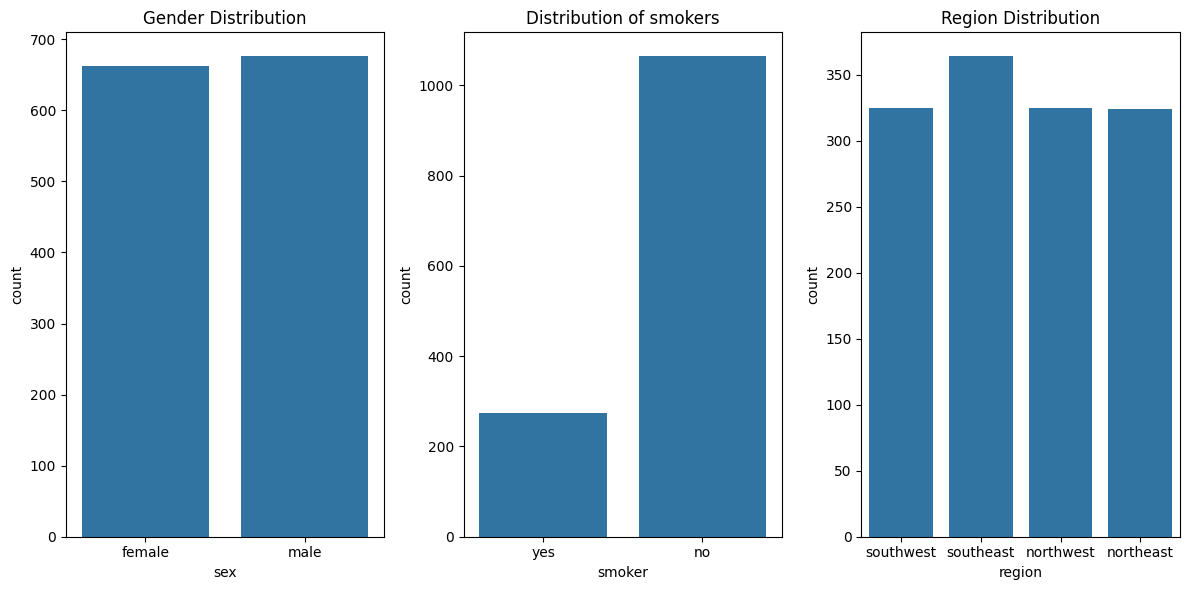

In [ ]:


# Let's visualize the distribution of categorical variables
plt.figure(figsize=(12, 6))

# Gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')

# Distribution of smokers
plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=df)
plt.title('Distribution of smokers')

# Region distribution
plt.subplot(1, 3, 3)
sns.countplot(x='region', data=df)
plt.title('Region Distribution')

plt.tight_layout()
plt.show()


1- sns.countplot(): This function draws bar graphs showing how many times each category (for example, male and female for the sex column) occurs.

2- plt.subplot(): Allows us to place multiple graphs on the screen at the same time. Here we have created 3 different graphs.

3- plt.tight_layout(): Places the graphs neatly.

This visualization helps us better understand the structure of the data and also guides us for further transformations.

## **5. Examining Outliers**

Boxplots and Z-scores are often used to detect outliers. First, let's visualize the outliers of numerical variables with a boxplot.

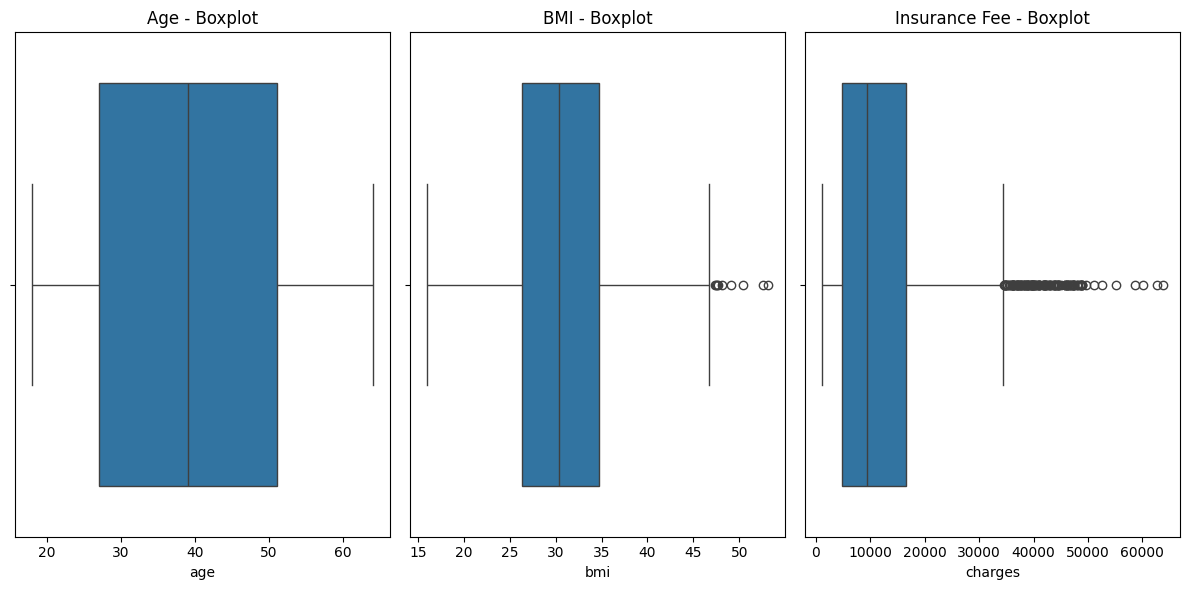

In [ ]:
# Let's visualize the outliers
plt.figure(figsize=(12, 6))

# Age
plt.subplot(1, 3, 1)
sns.boxplot(x=df['age'])
plt.title('Age - Boxplot')

# BMI
plt.subplot(1, 3, 2)
sns.boxplot(x=df['bmi'])
plt.title('BMI - Boxplot')

# Insurance Fee
plt.subplot(1, 3, 3)
sns.boxplot(x=df['charges'])
plt.title('Insurance Fee - Boxplot')

plt.tight_layout()
plt.show()

**plt.figure(figsize=(12, 6)):** This sets the size of the graphs we will create. We created a 12x6 area.

**plt.subplot(1, 3, 1):** It is used to place multiple graphs. Here we are making a layout with 1 row and 3 columns. We will place the first graph in the first column.

**sns.boxplot(x=df['column_name']):**

***sns.boxplot(): ***A boxplot is a graph that visualizes the median, quartiles, and outliers of data.

***x=df['column_name']: ***By changing this part, we determine which column we will create the boxplot for. For example, we selected the age column for the first graph, the bmi column for the second graph, and the charges column for the third graph.

**plt.tight_layout():** This aligns all the graphs properly. It helps us to make the best use of the spaces in the drawing area.

**plt.show():** It makes the graphics appear on the screen.

    With this code we visualized the possible outliers in the Age, BMI and Insurance Fee columns. The points outside the lines in the boxplot can be considered outliers.

## **6. Checking and Managing Missing Values**

In [ ]:
# Chekking missing values
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


df.isnull(): This checks if each cell in the dataset is missing and returns True/False** values.

sum(): Returns the sum of the missing (null) values ​​in each column

## **Data Transformatoin**

In [ ]:
# Converting categorical variables to numeric data (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Let's check the new dataframe
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Description:


---

*   pd.get_dummies(df, drop_first=True): Converts categorical variables to numeric data with one-hot encoding.

*   Here, the drop_first=True parameter helps prevent multicollinearity by discarding the first category.

*   df.head(): We print the first 5 lines to see the results.

## **8- Model Creation and Performance Evaluation**

In this step, we will establish our multivariate linear regression model and then evaluate the performance of the model using error metrics such as MAE, MSE, RMSE.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = df.drop('charges', axis=1)  # 'charges' sütunu dışında tüm sütunlar X
y = df['charges']  # 'charges' bağımlı değişken

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer regresyon modelini oluşturma ve eğitim
model = LinearRegression()
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Hata metriklerini hesaplama
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Sonuçları yazdırma
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


MAE (Mean Absolute Error): 4181.19447375365
MSE (Mean Squared Error): 33596915.85136145
RMSE (Root Mean Squared Error): 5796.284659276273
R^2 Score: 0.7835929767120724


*   train_test_split: Splits the data into training and test sets (80% training, 20% testing).

*   LinearRegression: Creates a linear regression model.

*   model.fit(): Trains the model with training data.

*   model.predict(): Makes predictions with test data.

*   Error metrics: MAE, MSE, RMSE and R^2 Score are calculated to evaluate the accuracy of the model.




In [ ]:
from google.colab import files

